# Data Compression - Homework #3

## Imports and helper functions

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from math import log
%matplotlib inline
def random_bin():
    return "0" if random.randint(1,10)<=8 else "1"
def generate_sequence(length):
    return "".join([random_bin() for _ in range(length)])
def bin_to_float(bin_sequence):
    res = 0
    for ind, bit in enumerate(bin_sequence[2:]):
        step = -(ind+1)
        if bit == "1":
            res += 2**step
    return res
def float_to_bin(n):
    div = 0.5
    res = "0."
    while n != 0:
        res += str(int(n//div))
        n %= div
        div /= 2
    return res
def arithmetic_encoding(sequence, seperator):
    upper = 1
    middle = seperator
    lower = 0
    for bit in sequence:
        if bit == "0":
            upper = middle
        else:
            lower = middle
        middle = lower + (upper-lower)*seperator
    tag = (lower+upper)/2
    bin_tag = float_to_bin(tag)
    bin_length = 6
    tag = bin_to_float(bin_tag[:bin_length])
    while tag<lower or upper<tag:
        bin_length += 1
        tag = bin_to_float(bin_tag[:bin_length])
    bin_tag = bin_tag[:bin_length]
    return tag, bin_tag

## Arithmetic Encoding Example

In [3]:
sequence = generate_sequence(20)
print("random {} bits long binary sequence: {}".format(20, sequence))
tag, bin_tag = arithmetic_encoding(sequence, 0.8)
print("Arithmetic Encoded Tag: {} ({})".format(tag, bin_tag))

random 20 bits long binary sequence: 00101000100000010000
Arithmetic Encoded Tag: 0.602752685546875 (0.100110100100111)


## Plot functions of length and entropy

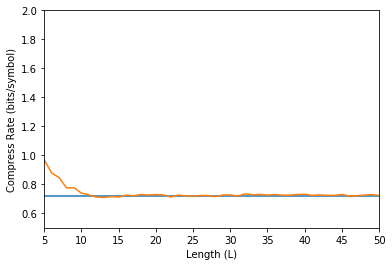

In [4]:
FROM = 5
TO = 50
SAMPLES = 1000
ENTROPY = -0.8*log(0.8, 2)-0.2*log(0.2, 2)
rates = []
for L in range(FROM, TO+1):
    tmp_rates = []
    for ind in range(SAMPLES):
        sequence = generate_sequence(L)
        tag, bin_tag = arithmetic_encoding(sequence, 0.8)
        rate = (len(bin_tag)-2)/L
        tmp_rates.append(rate)
    rates.append(np.mean(tmp_rates))
plt.axis([FROM, TO, 0.5, 2])
plt.plot(range(FROM, TO+1), [ENTROPY]*(TO-FROM+1))
plt.plot(range(FROM, TO+1), rates)
plt.xlabel("Length (L)")
plt.ylabel("Compress Rate (bits/symbol)")
plt.show()

## Conclusion

By Observing the plot, we can discover that besides when the sequence length (L) is too short (L<10), arithmetic encoding have a extraordinary compress rate which almost hit the entropy.